# Countries, Flags and Happiness – Cleaned Data EDA

In [15]:
# libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [14]:
from google.colab import files

happiness = pd.read_csv("2015.csv")
flags = pd.read_csv("flagss.csv", sep=';')

# ulke adlari matchleme
happiness['Country'] = happiness['Country'].str.strip().str.lower()
flags['name'] = flags['name'].str.strip().str.lower()

# sadece eslesen ulkeleri al
merged = pd.merge(happiness, flags, left_on='Country', right_on='name', how='inner')
print(f"Merged dataset shape: {merged.shape}")
merged.head()

Merged dataset shape: (104, 43)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0,0,0,0,0,0,0,0,red,red
1,iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0,0,0,0,0,0,0,0,blue,blue
2,denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0,0,0,0,0,0,0,0,red,red
3,norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0,0,0,0,0,0,0,0,red,red
4,canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0,0,0,0,0,0,1,0,red,red


### 1. Histogram of Happiness Scores

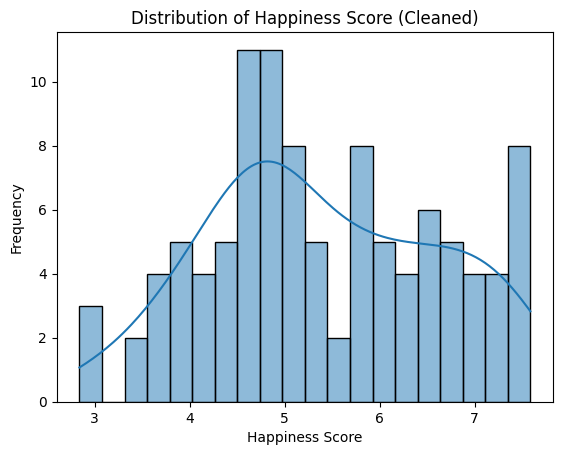

In [4]:
sns.histplot(merged['Happiness Score'], bins=20, kde=True)
plt.title("Distribution of Happiness Score (Cleaned)")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

### 2. Top 15 Happiest Countries

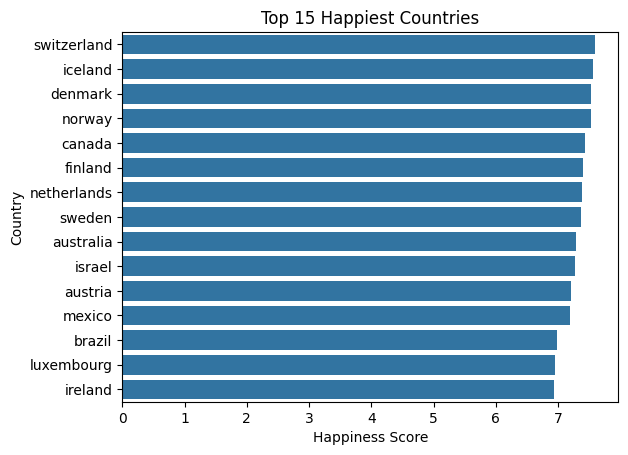

In [5]:
top15 = merged.sort_values(by='Happiness Score', ascending=False).head(15)
sns.barplot(data=top15, y='Country', x='Happiness Score')
plt.title("Top 15 Happiest Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

### 3. Happiness Score by Region

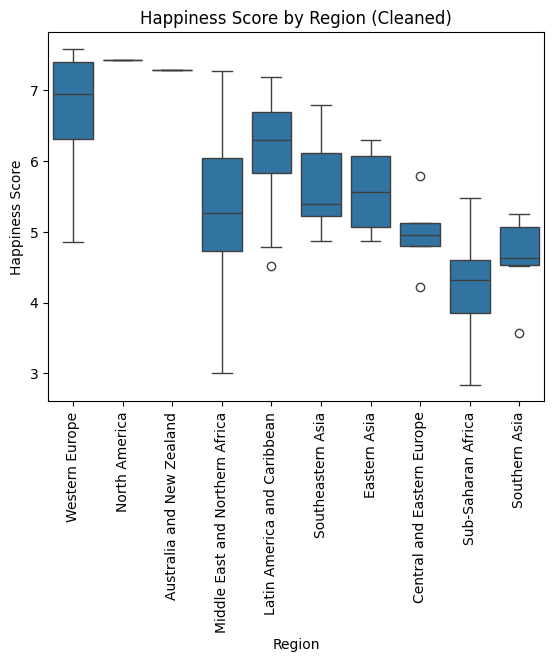

In [6]:
sns.boxplot(data=merged, x='Region', y='Happiness Score')
plt.xticks(rotation=90)
plt.title("Happiness Score by Region (Cleaned)")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.show()

### 4. Correlation Heatmap

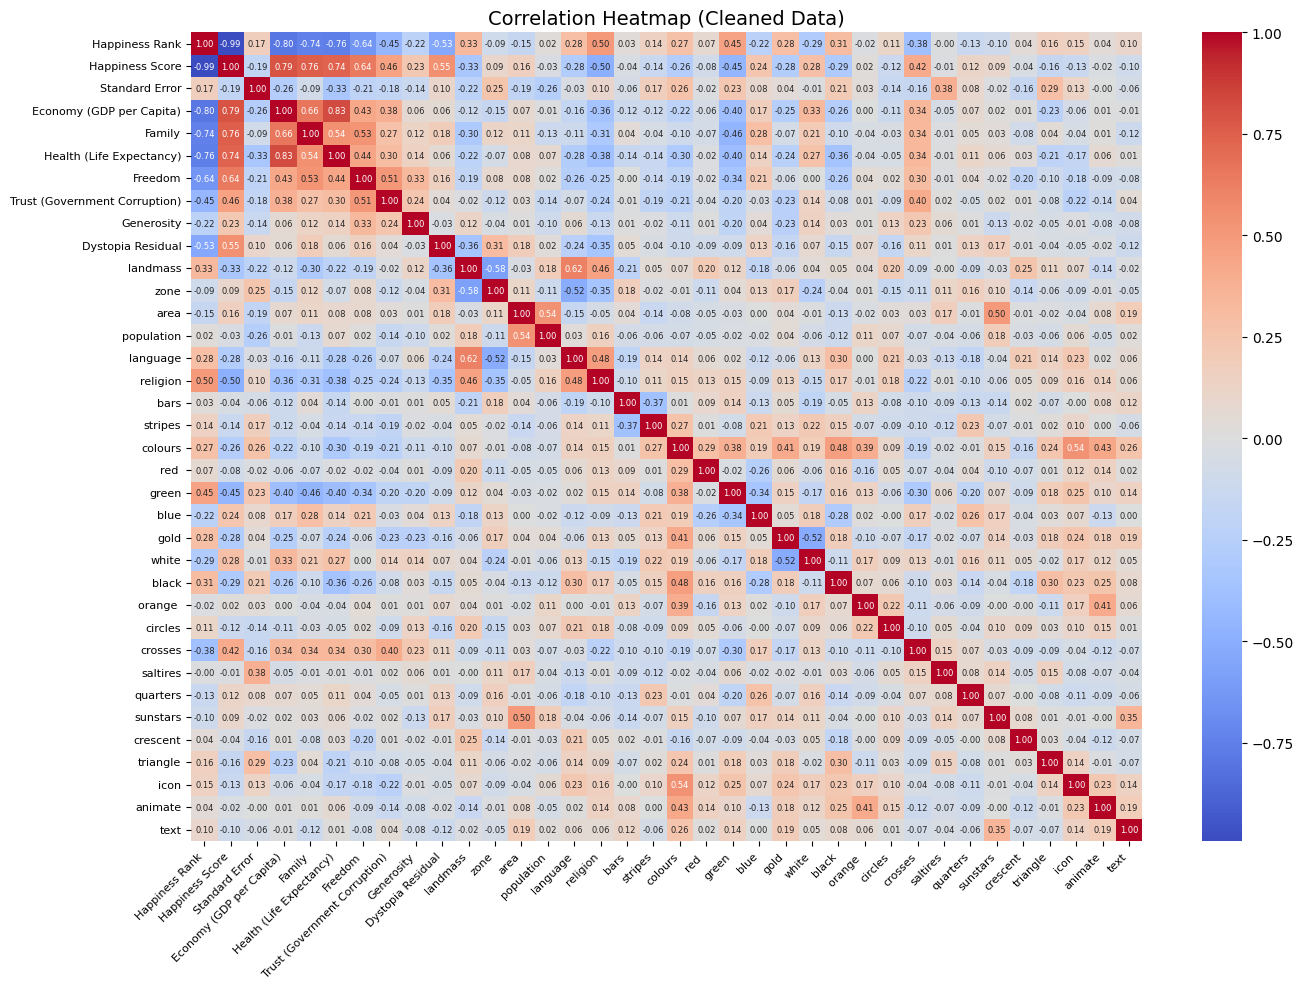

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
corr = merged.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 6})
plt.title("Correlation Heatmap (Cleaned Data)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


### 5. Freedom vs Happiness Score

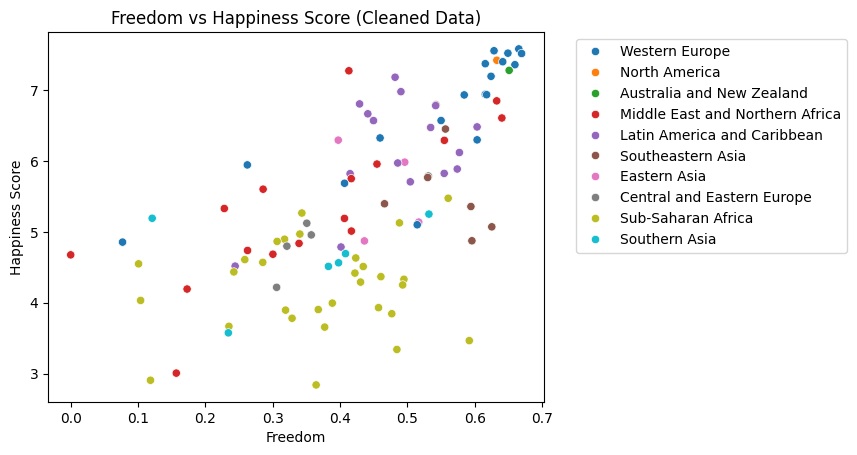

In [8]:
sns.scatterplot(data=merged, x='Freedom', y='Happiness Score', hue='Region')
plt.title("Freedom vs Happiness Score (Cleaned Data)")
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
# Hypothesis Testing: "Freedom vs Happiness Score"

from scipy.stats import pearsonr

freedom = merged["Freedom"]
happiness = merged["Happiness Score"]

# apply pearson correlation test
r_value, p_value = pearsonr(freedom, happiness)

print("Hypothesis Testing: Freedom vs Happiness Score")
print(f"Correlation Coefficient (r): {r_value:.4f}")
print(f"P-value: {p_value:.4f}")

# RESULTS WE GET
if p_value < 0.05:
    print("→ Reject the null hypothesis (H₀).")
    print("→ Freedom and Happiness Score are significantly positively correlated.")
else:
    print("→ Fail to reject the null hypothesis (H₀).")
    print("→ No significant correlation between Freedom and Happiness Score.")


Hypothesis Testing: Freedom vs Happiness Score
Correlation Coefficient (r): 0.6429
P-value: 0.0000
→ Reject the null hypothesis (H₀).
→ Freedom and Happiness Score are significantly positively correlated.
